## Visualization for task 1.1, 1.2

In [1]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

WRONG_LIST = [9,41]

VALID_NUMBER = []
for i in range(150):
    VALID_NUMBER.append(str(i+1))

In [2]:
def check_valid_lines(line):
    language_ID = line[0]
    speaker_ID = line[1]
    speaker_age = line[2]
    speaker_gender = line[3]
    if language_ID not in VALID_NUMBER[:110]:
        return []
    if speaker_ID not in VALID_NUMBER[:50]:
        return []
    if speaker_age not in VALID_NUMBER:
        return []
    if speaker_gender not in ['M','F']:
        speaker_gender = 'O'
    return [language_ID, speaker_ID, speaker_age, speaker_gender]



data_origin = {'language_ID': [],
              'speaker_ID':[],
              'speaker_age':[],
              'speaker_gender':[]}

with open('spkr.txt','r') as f:
    for line in f:
        tmp_content = line.split()
        line_content = check_valid_lines(tmp_content)
        if len(line_content)!=0:
            data_origin['language_ID'].append(line_content[0])
            data_origin['speaker_ID'].append(line_content[1])
            data_origin['speaker_age'].append(line_content[2])
            data_origin['speaker_gender'].append(line_content[3])

data_df = pd.DataFrame(data_origin)

data_lang = data_df[data_df['language_ID'].isin(['4','5'])]
num_male = data_lang['speaker_gender'].value_counts()['M']
num_female = data_lang['speaker_gender'].value_counts()['F']
num_others = data_lang['speaker_gender'].value_counts().sum() - num_female-num_male

## Multiple pie charts

No handles with labels found to put in legend.


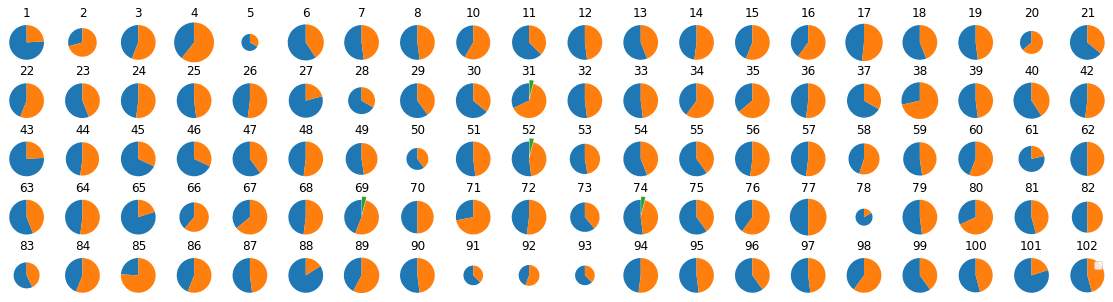

In [3]:
# ========================= Figure 1 ==========================================
labels = 'Male', 'Female', 'Not to tell'
idx = 0

fig1, ax = plt.subplots(5,20, figsize=(20,5))

for i in range(5):
    for j in range(20):
        idx += 1
        while idx in WRONG_LIST:
            idx += 1
        data_lang = data_df[data_df['language_ID']==str(idx)]
        num_total = data_lang['speaker_gender'].value_counts().sum()
        num_male = data_lang['speaker_gender'].value_counts()['M']
        num_female = data_lang['speaker_gender'].value_counts()['F']
        num_others = num_total - num_female-num_male
        sizes = [num_male, num_female, num_others]
        explode = (0,0,0.2)
        radius = num_total/20
        ax[i][j].pie(sizes,radius=np.sqrt(radius),explode=explode,startangle=90)
        ax[i][j].set_title(str(idx))
plt.subplots_adjust(hspace=0.5,wspace=0.01)
plt.legend()
plt.show()

## Ring-pie chart

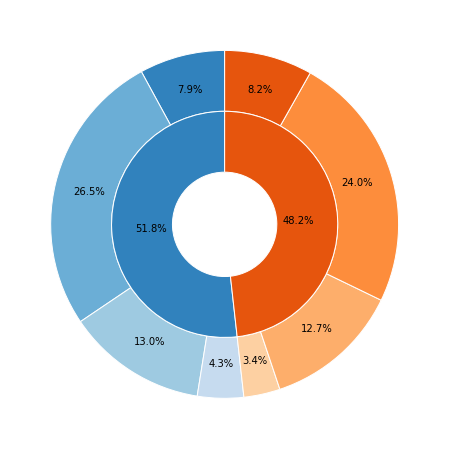

In [4]:
AGE_LIST = [['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'],
            ['21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40'],
            ['41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60'],
            ['61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80',
             '81','82','83','84','85','86','87','88','89','90','91','92','93','94','95','96','97','98','99','100']
        ]
TITLE = ['<20','20~40','40~60','>60']

fig2, ax = plt.subplots(figsize=(8,8))
size = 0.35
vals = np.zeros((4,2))

for i in range(4):
    data_lang=data_df[data_df['speaker_age'].isin(AGE_LIST[i])]
    num_total = data_lang['speaker_gender'].value_counts().sum()
    num_male = data_lang['speaker_gender'].value_counts()['M']
    num_female = data_lang['speaker_gender'].value_counts()['F']
    vals[i][0] = num_male
    vals[i][1] = num_female

cmap = plt.get_cmap("tab20c")
outer_colors = cmap([0,1,2,3,7,6,5,4])
inner_colors = cmap(np.arange(2)*4)

vals_outer = vals.T
vals_outer[1,:] = vals_outer[1,::-1]
ax.pie(vals_outer.flatten(), radius=1, colors=outer_colors,startangle=90, autopct='%.1f%%',pctdistance=0.8,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.sum(axis=0), radius=1-size, colors=inner_colors,startangle=90, autopct='%.1f%%',pctdistance=0.65,
       wedgeprops=dict(width=size, edgecolor='w'))

plt.show()

## Stacked bar charts

/home/joshua/.conda/envs/beta_vae/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
/home/joshua/.conda/envs/beta_vae/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
/home/joshua/.conda/envs/beta_vae/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


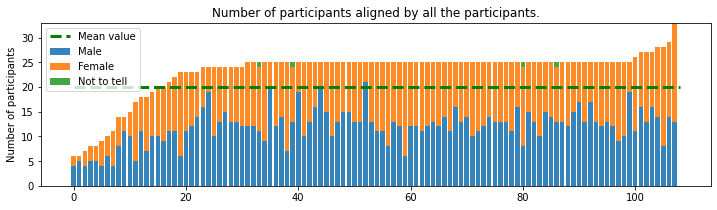

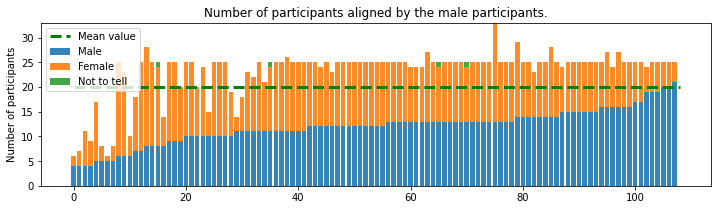

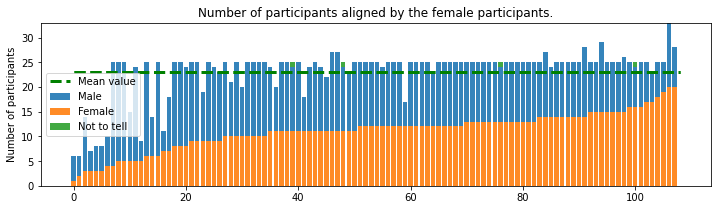

In [5]:
# ========================= Figure 3 ==========================================
labels = []
males = []
females = []
num_totals = []
others = []
width = 0.8
idx = 0
x = np.arange(0,108,1)

for i in range(108):
    idx += 1
    while idx in WRONG_LIST:
        idx += 1
    data_lang = data_df[data_df['language_ID']==str(idx)]
    num_total = data_lang['speaker_gender'].value_counts().sum()
    num_male = data_lang['speaker_gender'].value_counts()['M']
    num_female = data_lang['speaker_gender'].value_counts()['F']
    num_others = num_total - num_female-num_male
    labels.append(str(idx))
    males.append(num_male)
    females.append(num_female)
    num_totals.append(num_total)
    others.append(num_others)

df_fig3 = pd.DataFrame({'labels':labels,
           'males':males,
           'females':females,
           'all':num_totals,
           'others':others})

df_fig3_sort_all = df_fig3.sort_index(axis=0,ascending=True,by=['all'])   
df_fig3_sort_male = df_fig3.sort_index(axis=0,ascending=True,by=['males'])   
df_fig3_sort_female = df_fig3.sort_index(axis=0,ascending=True,by=['females'])   
    
def show_figure3(df_fig3,title):
    fig3, ax = plt.subplots(figsize=(12,3))
    ax.bar(x, df_fig3['males'],width,label='Male',alpha=0.9)
    ax.bar(x, df_fig3['females'],width,label='Female',bottom=df_fig3['males'],alpha=0.9)
    ax.bar(x, df_fig3['others'],width,label='Not to tell',bottom=df_fig3['males']+df_fig3['females'],alpha=0.9)
    ax.plot([0,108],[20,20],linestyle='--', color='green',linewidth=3,label='Mean value')
    ax.set_ylabel('Number of participants')
    ax.set_title(title)
    ax.legend()
    
    plt.show()
    
    
def show_figure3_female(df_fig3,title):
    fig3, ax = plt.subplots(figsize=(12,3))
    ax.bar(x, df_fig3['males'],width,label='Male',bottom=df_fig3['females'],alpha=0.9)
    ax.bar(x, df_fig3['females'],width,label='Female',alpha=0.9)
    ax.bar(x, df_fig3['others'],width,label='Not to tell',bottom=df_fig3['males']+df_fig3['females'],alpha=0.9)
    ax.set_ylabel('Number of participants')
    ax.set_title(title)
    ax.plot([0,108],[23.12,23.12],linestyle='--', color='green',linewidth=3,label='Mean value')
    ax.legend()
    ax.plot([0,108],[23.12,23.12],linestyle='--', color='green',linewidth=3,label='Mean value')
    plt.show()

show_figure3(df_fig3_sort_all, title='Number of participants aligned by all the participants.')
show_figure3(df_fig3_sort_male, title='Number of participants aligned by the male participants.')
show_figure3_female(df_fig3_sort_female, title='Number of participants aligned by the female participants.')